In [150]:
## https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [75]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import os

### First-step overview

In [76]:
#load data from csv file
data = pd.read_csv(r'data/banking.csv')

#have a look at the categorical data for their unique values
for i in data.dtypes.index:
    if data.dtypes[i] == 'object':
        print('Categorical variable {:s} has unique unique values as follows: '.format(i.upper()), end='')
        print(*data[i].unique(), sep=',')
        print()

Categorical variable JOB has unique unique values as follows: blue-collar,technician,management,services,retired,admin.,housemaid,unemployed,entrepreneur,self-employed,unknown,student

Categorical variable MARITAL has unique unique values as follows: married,single,divorced,unknown

Categorical variable EDUCATION has unique unique values as follows: basic.4y,unknown,university.degree,high.school,basic.9y,professional.course,basic.6y,illiterate

Categorical variable DEFAULT has unique unique values as follows: unknown,no,yes

Categorical variable HOUSING has unique unique values as follows: yes,no,unknown

Categorical variable LOAN has unique unique values as follows: no,yes,unknown

Categorical variable CONTACT has unique unique values as follows: cellular,telephone

Categorical variable MONTH has unique unique values as follows: aug,nov,jun,apr,jul,may,oct,mar,sep,dec

Categorical variable DAY_OF_WEEK has unique unique values as follows: thu,fri,tue,mon,wed

Categorical variable POUTC

In [77]:
#next we are going to group education including basic.4y, basic.9y, basic.6y as basic
#data.loc[data.education.str.lower().str.match('.*basic.*'), :] == 'basic'
#or
data.education = data.education.str.lower().str.replace(pat = '.*basic.*', repl='basic') 

In [78]:
#after grouping
data.education.unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [79]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Data Exploration

Proportion of Y label

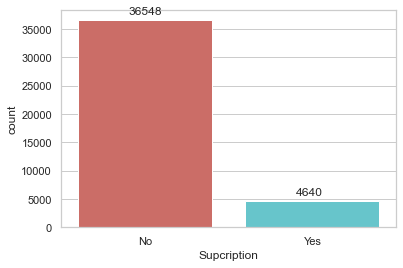

In [134]:
ax = sns.countplot(x='y', data=data, palette='hls')
ax.set_xlabel('Supcription')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
for i in ax.patches:
    
    plt.annotate('{}'.format(i.get_height()), xy =(i.get_x() + 0.3, i.get_height() + 1000))
plt.show()

As we see, our label y is imbalance, this cen be shown through:

In [139]:
print('The proportion of subscribers in the data set: {:.2f}%'.format(data['y'].mean() * 100))

The proportion of subscribers in the data set: 11.27%


In [140]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


There is no new insights from the group of y by numeric variables - as we see no much difference between customers and non-customers. 

Obviously, we would spend more time for our subscribers (so our average duration for y = 1 is twice that of non-subcribers). We keep in touch with those who use our services, thus having higher pdays for y=1 than y=0. 

In order to conquer those who not yet our customers, we gonna aim the campaigns (marketing, customer service, products...) at this group.

### Visualizations